In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-turbofan-engine-degradation-simulation/RUL_FD002.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/test_FD003.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/Damage Propagation Modeling.pdf
/kaggle/input/nasa-turbofan-engine-degradation-simulation/readme.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/train_FD003.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/test_FD004.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/train_FD004.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/test_FD002.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/train_FD001.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/train_FD002.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/RUL_FD001.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/RUL_FD004.txt
/kaggle/input/nasa-turbofan-engine-degradation-simulation/RUL_FD003.txt
/kaggle/input/nasa-turbofan-engine-deg

In [6]:
import pandas as pd

path = "/kaggle/input/nasa-turbofan-engine-degradation-simulation/train_FD001.txt"

df = pd.read_csv(path, sep=" ", header=None)
df = df.dropna(axis=1)

print("Shape:", df.shape)
df.head()

Shape: (20631, 26)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
df.columns = ["engine_id", "cycle"]+[f"s{i}" for i in range(1, df.shape[1]-1)] #you cant add individually continously u should give 26 names so first 2 then plus 24
df.head()

,engine_id,cycle,s1,s2,s3,s4,s5,s6,s7,s8,...,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
# 1) Find the last cycle (failure point) for each engine
max_cycle = df.groupby("engine_id")["cycle"].max().reset_index()

# 2) Attach that max cycle back to every row of that engine
df = df.merge(max_cycle, on="engine_id", suffixes=("", "_max"))

# 3) RUL = final_cycle - current_cycle
df["RUL"] = df["cycle_max"] - df["cycle"]

# 4) Remove the helper column (to avoid cheating)
df = df.drop("cycle_max", axis=1)

# Check result
df[["engine_id", "cycle", "RUL"]].head()

,engine_id,cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


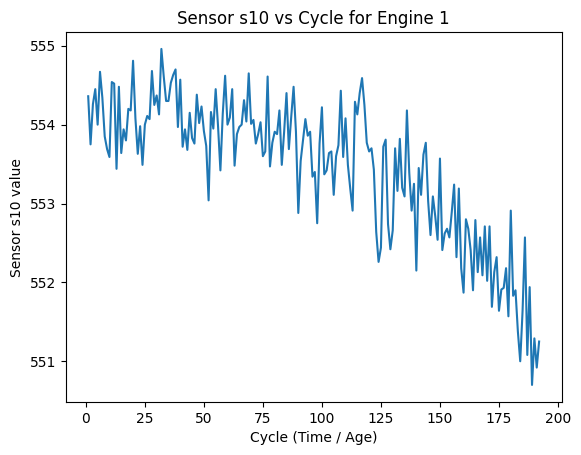

In [24]:
import matplotlib.pyplot as plt

# Pick one engine
engine_1 = df[df["engine_id"] == 1]

# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s10"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s10 value")
plt.title("Sensor s10 vs Cycle for Engine 1")
plt.show()

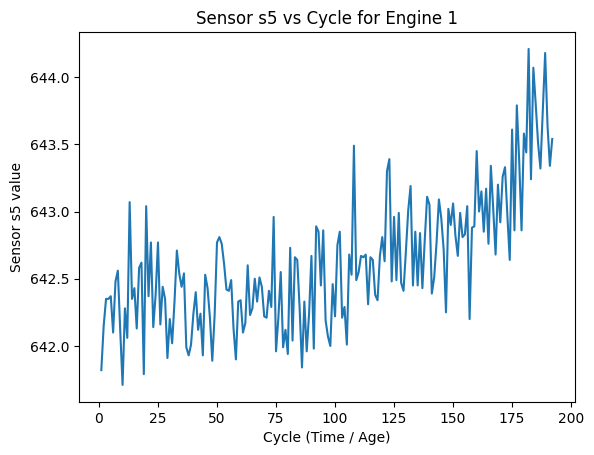

In [26]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s5"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s5 value")
plt.title("Sensor s5 vs Cycle for Engine 1")
plt.show()

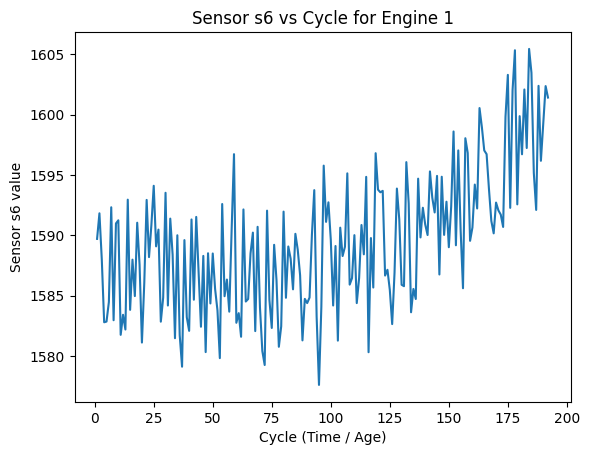

In [27]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s6"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s6 value")
plt.title("Sensor s6 vs Cycle for Engine 1")
plt.show()

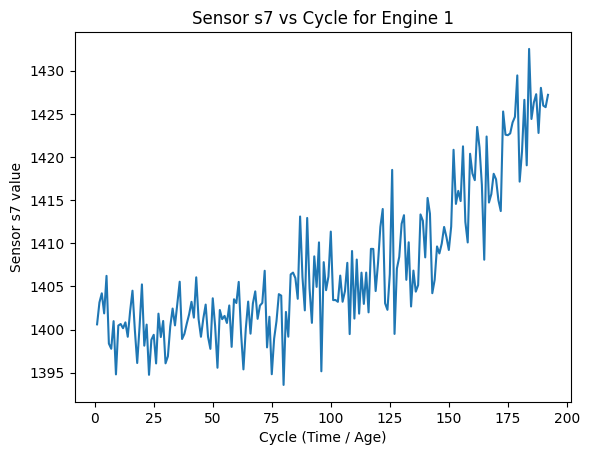

In [28]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s7"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s7 value")
plt.title("Sensor s7 vs Cycle for Engine 1")
plt.show()

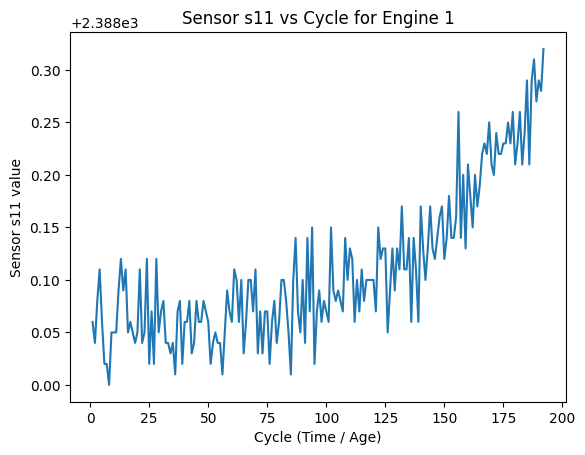

In [30]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s11"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s11 value")
plt.title("Sensor s11 vs Cycle for Engine 1")
plt.show()

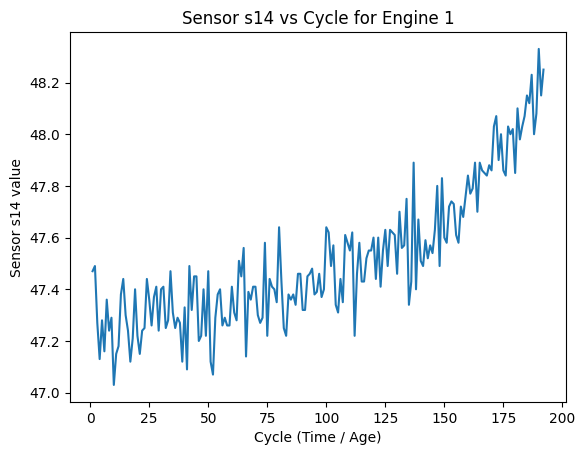

In [34]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s14"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s14 value")
plt.title("Sensor s14 vs Cycle for Engine 1")
plt.show()

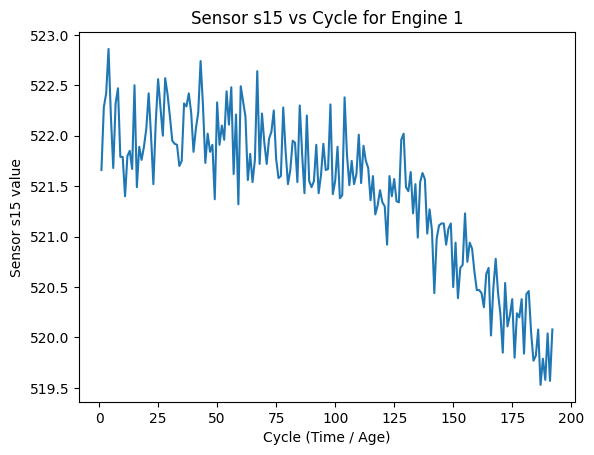

In [36]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s15"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s15 value")
plt.title("Sensor s15 vs Cycle for Engine 1")
plt.show()

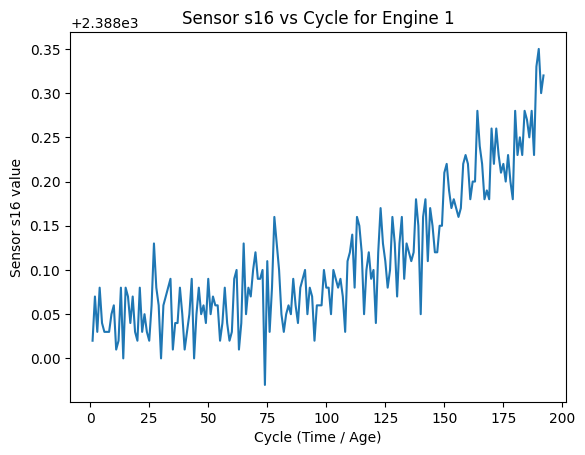

In [38]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s16"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s16 value")
plt.title("Sensor s16 vs Cycle for Engine 1")
plt.show()

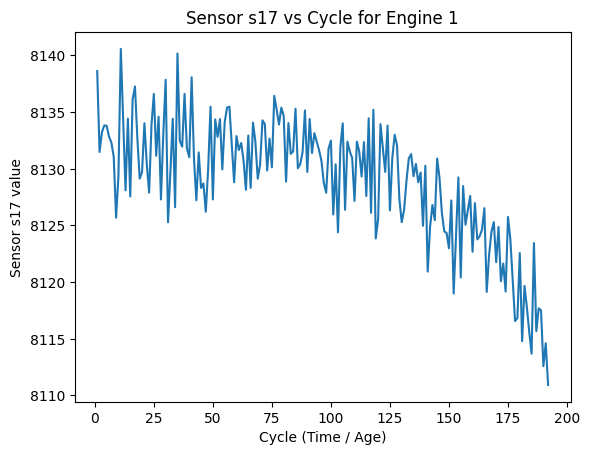

In [40]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s17"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s17 value")
plt.title("Sensor s17 vs Cycle for Engine 1")
plt.show()

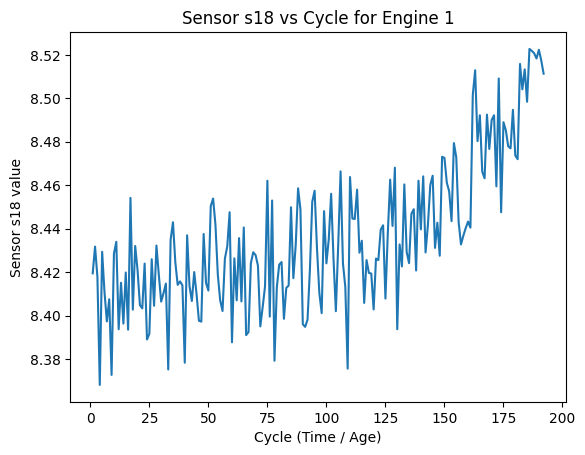

In [41]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s18"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s18 value")
plt.title("Sensor s18 vs Cycle for Engine 1")
plt.show()

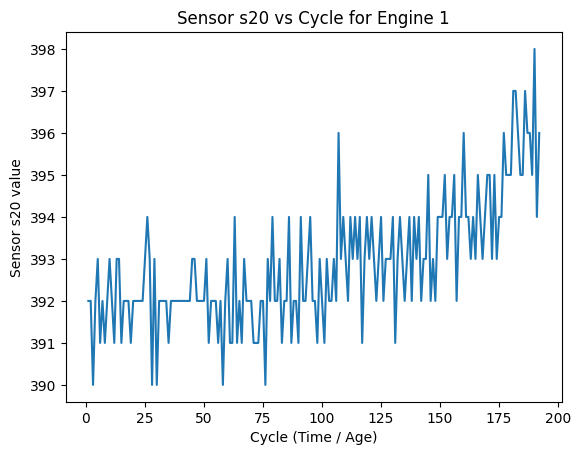

In [44]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s20"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s20 value")
plt.title("Sensor s20 vs Cycle for Engine 1")
plt.show()

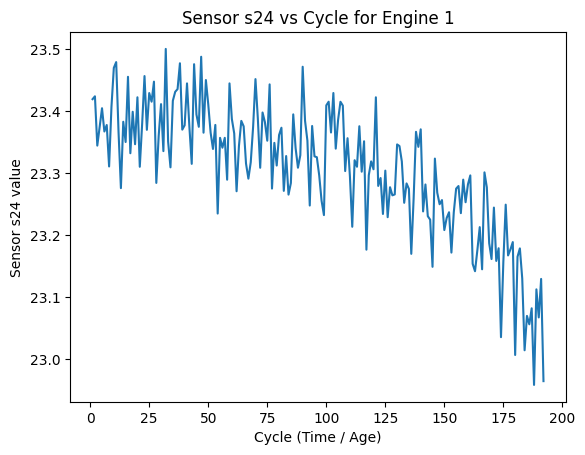

In [49]:
# Plot how sensor s1 changes over time
plt.figure()
plt.plot(engine_1["cycle"], engine_1["s24"])
plt.xlabel("Cycle (Time / Age)")
plt.ylabel("Sensor s24 value")
plt.title("Sensor s24 vs Cycle for Engine 1")
plt.show()

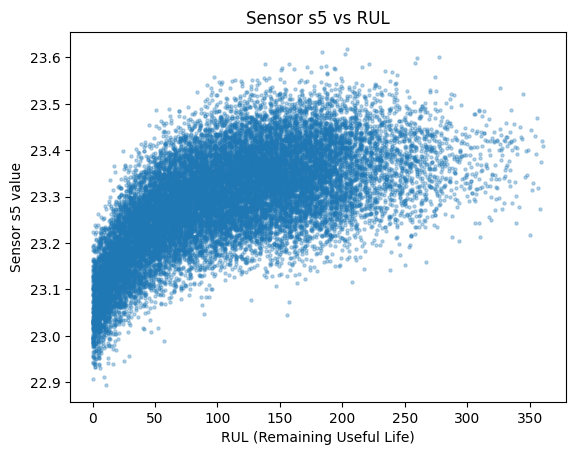

In [53]:
plt.figure()
plt.scatter(df["RUL"], df["s24"], s=5, alpha=0.3)
plt.xlabel("RUL (Remaining Useful Life)")
plt.ylabel("Sensor s5 value")
plt.title("Sensor s5 vs RUL")
plt.show()

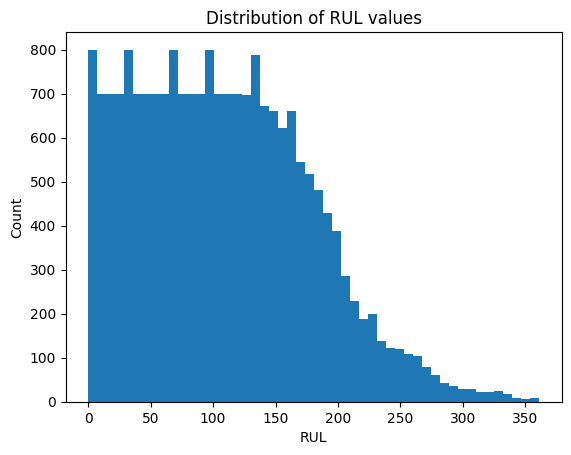

In [62]:
plt.figure()
plt.hist(df["RUL"],bins=50)
plt.xlabel("RUL")
plt.ylabel("Count")
plt.title("Distribution of RUL values")
plt.show()

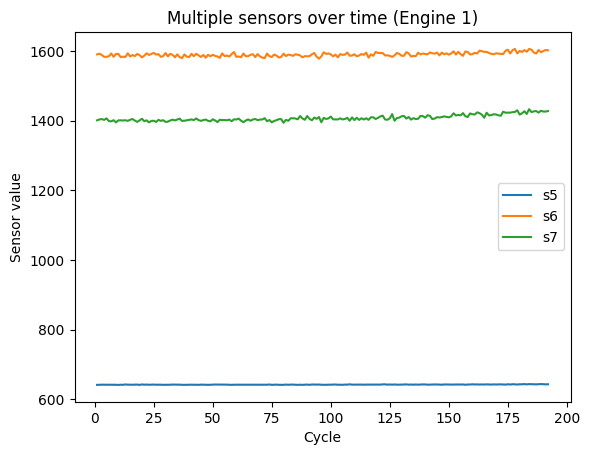

In [61]:
engine_1 = df[df["engine_id"] == 1]

plt.figure()
plt.plot(engine_1["cycle"], engine_1["s5"], label="s5")
plt.plot(engine_1["cycle"], engine_1["s6"], label="s6")
plt.plot(engine_1["cycle"], engine_1["s7"], label="s7")
plt.xlabel("Cycle")
plt.ylabel("Sensor value")
plt.title("Multiple sensors over time (Engine 1)")
plt.legend()
plt.show()

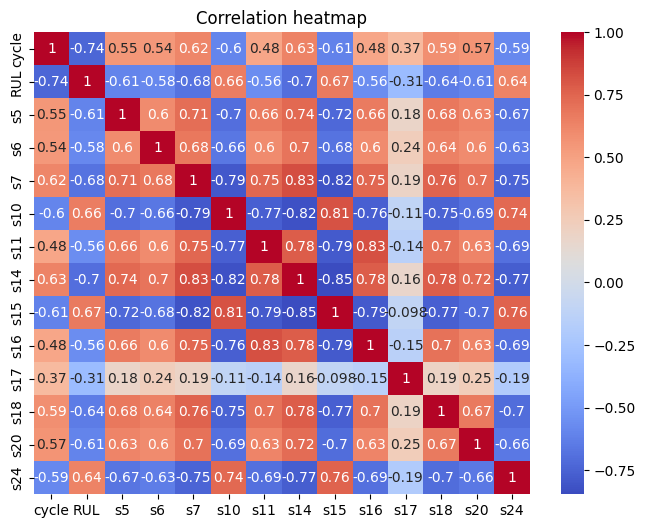

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

selected = ["cycle", "RUL", "s5", "s6", "s7", "s10", "s11", "s14", "s15", "s16","s17","s18","s20","s24"]
corr = df[selected].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

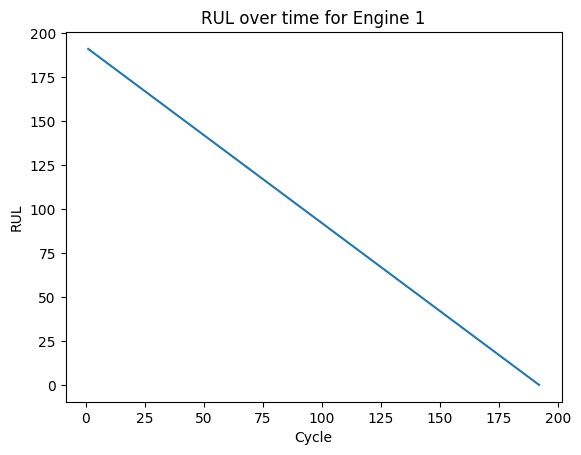

In [65]:
engine_1 = df[df["engine_id"] == 1]

plt.figure()
plt.plot(engine_1["cycle"], engine_1["RUL"])
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.title("RUL over time for Engine 1")
plt.show()

In [66]:
# 1) Compute correlation of all columns with RUL
corr_with_rul = df.corr(numeric_only=True)["RUL"].sort_values(key=abs, ascending=False)

# 2) Show top correlations (excluding RUL itself)
corr_with_rul.drop("RUL").head(15)

cycle   -0.736241
s14     -0.696228
s7      -0.678948
s15      0.671983
s10      0.657223
s18     -0.642667
s24      0.635662
s23      0.629428
s5      -0.606484
s20     -0.606154
s6      -0.584520
s11     -0.563968
s16     -0.562569
s12     -0.390102
s17     -0.306769
Name: RUL, dtype: float64

In [68]:
# 1) Baseline: only cycle
X1 = df[["cycle"]]

# 2) Strong but small set: cycle + top 5 sensors
top5 = ["s14", "s7", "s15", "s10", "s18"]
X2 = df[["cycle"] + top5]

# 3) Full selected set: cycle + all your good sensors
good_sensors = ["s14", "s7", "s15", "s10", "s18", "s24", "s23", "s5", "s20", "s6", "s11", "s16", "s17"]
X3 = df[["cycle"] + good_sensors]

y = df["RUL"]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae, model

In [71]:
mae1, model1 = train_and_evaluate(X1, y)
mae2, model2 = train_and_evaluate(X2, y)
mae3, model3 = train_and_evaluate(X3, y)

print("MAE (cycle only):", mae1)
print("MAE (cycle + top 5 sensors):", mae2)
print("MAE (cycle + all selected sensors):", mae3)

MAE (cycle only): 32.97899293374539
MAE (cycle + top 5 sensors): 27.752167837816007
MAE (cycle + all selected sensors): 25.36677247395202


In [72]:
import pandas as pd

# model3 is your best model (cycle + all selected sensors)
importances = pd.Series(model3.feature_importances_, index=X3.columns)

# Sort by importance
importances_sorted = importances.sort_values(ascending=False)
importances_sorted

cycle    0.543064
s14      0.145985
s17      0.050805
s7       0.043505
s15      0.035341
s10      0.027262
s18      0.025508
s24      0.024401
s6       0.022932
s5       0.022494
s23      0.017937
s16      0.016571
s11      0.016536
s20      0.007661
dtype: float64

In [74]:
X = X3   # cycle + all selected sensors
y = df["RUL"]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred)

print("MAE (XGBoost):", mae_xgb)

MAE (XGBoost): 25.54244613647461


In [77]:
import pandas as pd

# model3 = your best Random Forest model (cycle + all selected sensors)
importances = pd.Series(model3.feature_importances_, index=X3.columns)
importances_sorted = importances.sort_values(ascending=False)

importances_sorted

cycle    0.543064
s14      0.145985
s17      0.050805
s7       0.043505
s15      0.035341
s10      0.027262
s18      0.025508
s24      0.024401
s6       0.022932
s5       0.022494
s23      0.017937
s16      0.016571
s11      0.016536
s20      0.007661
dtype: float64